In [1]:
from init import readFile
FILE = 'Samples\\temperature_sample_calibrate2.csv'
time, temperature = readFile(FILE)

In [2]:
# Denoise
from noise.noise import non_uniform_savgol

temperature_hat = non_uniform_savgol(time, temperature, 9, 8)

In [3]:
from init import initPopulation

population = initPopulation(25)

In [4]:
from fit import fit, stopAfter
from init import BORNE_A, BORNE_B, BORNE_C
import numpy as np

best, best_fitness, duration = fit(population, time, temperature_hat, nb_of_cycle=1000, stopFunction=stopAfter(1000), number_of_parents=10, alpha_a_crossover=.2, number_of_bc_flips=4, number_of_resets=10, number_of_a_variations=10, a_std_mutation=.1, borne_a=BORNE_A, borne_b=BORNE_B, borne_c=BORNE_C) 

100% (1000 of 1000) |####################| Elapsed Time: 0:00:11 Time:  0:00:11

best fitness : 0.06050009312611855
best individual : [ 0.14020027 19.          2.        ]
durations : 11.326577425003052


In [5]:
from individu import temperatureCalculIndividu as temperatureCalc
from population import total_fitness

real_temperature = np.array([temperatureCalc(i, .14, 19, 5) for i in time])
real_fitness = total_fitness(np.array(best), time, real_temperature)

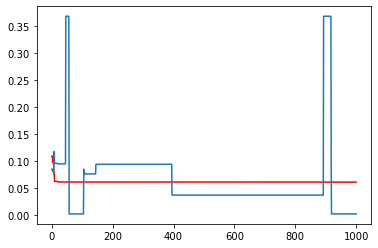

In [6]:
import matplotlib.pyplot as plt
plt.plot(best_fitness, c="red")
plt.plot(real_fitness)